In [1]:
#%loadpy /home/tony/Desktop/SouthAfrica/transit.py

In [2]:
#!/usr/bin/env python
import ephem
import numpy as np
kat = ephem.Observer()
kat.lat = '-30.71317'
kat.long = '21.44389'
kat.elevation = 1038
kat.temp=25
kat.pressure=900
kat.date = ephem.now()

# current
print "Local Time  ", ephem.localtime(ephem.now())
print "Julian date ", ephem.julian_date()
print "Sideral Time", kat.sidereal_time()

# 19h39m25.0s -63d42m46
# set up source
src = ephem.FixedBody()
src._ra = '19:39:25.02671'         # default epoch (J2000)
src._dec = '-63:42:45.63'
src.name = "PKS 1934-638"
src.compute(kat)

# get transit properties -- note times are normally in UT!
# Note ORDER is important !
# next really does mean next after that time

print ("%s at Alt %s Az %s") %(src.name,src.alt,src.az)

print "Transit    ",ephem.localtime(kat.next_transit(src))
print " src trans ",ephem.localtime(src.transit_time)
print "Transit Alt",src.transit_alt
if src.circumpolar == False:
    print "Rise       ",ephem.localtime(kat.next_rising(src))
    print " src rise  ",ephem.localtime(src.rise_time)
    print "Set        ",ephem.localtime(kat.next_setting(src))
    print " src set   ",ephem.localtime(src.set_time)
else:
    print "Circumpolar"

Local Time   2015-04-23 15:09:40.000003
Julian date  2457136.04838
Sideral Time 4:40:29.70
PKS 1934-638 at Alt 10:56:03.3 Az 198:39:06.4
Transit     2015-04-24 06:07:32.000004
 src trans  2015-04-24 06:07:32.000004
Transit Alt 57:03:05.9
Circumpolar


In [3]:
sun=ephem.Sun()
sun.compute(kat)
print sun.az, sun.alt, sun.set_time, sun.set_az, sun.rise_az

312:49:09.4 32:37:40.2 2015/4/23 16:04:23 284:22:38.0 75:47:56.4


In [4]:
np.degrees(src.az) ,np.degrees(src.alt)


(180.00000500895632, 57.051651476673143)

In [5]:
import numpy as np
az='180:00:00' ; el='31:00:00'
print np.degrees(kat.radec_of(az,el))
az=np.radians(180.0) ; el=np.radians(30.8135)
print np.degrees(kat.radec_of(az,el))

[ 89.48400956 -89.74478395]
[ 127.6857988   -89.89902453]


In [6]:
RA=[]
DEC=[]
for eld in range(10,90,10):
    el=np.radians(eld)
   #print el
    for azd in range(-180,180,1):
        az=np.radians(azd)
        #print az
        #print np.degrees(kat.radec_of(az,el))
        RA.append(np.degrees(kat.radec_of(az,el))[0])
        DEC.append(np.degrees(kat.radec_of(az,el))[1])
        #print RA,DEC

Populating the interactive namespace from numpy and matplotlib


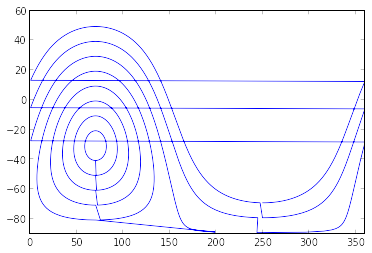

In [7]:
%pylab inline
ra=np.array(RA)
dec=np.array(DEC)
pylab.plot(ra,dec)
pylab.xlim([0,360])
pylab.ylim([-90,60])
pylab.show()